# Detrending

Data detrending can be performed using the `detrend` method of a `detrend1d._Model` object. These model objects specify a model of the whole dataset, then can be fit to specific datasets. The only model implemented currently is a `LinearDriftOverTimeModel` model. It can be used as follows:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import detrend1d as dtr

Let's first create a synthetic dataset (see the "Synthetic Datasets" notebook):

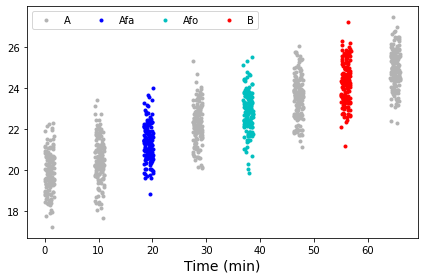

In [2]:
# create generator:
n          = 150    # number of observations per session
cond       = [0, 0, 1, 0, 2, 0, 3, 0]   # conditions
nsess      = len(cond)
mu         = np.linspace(20, 25, len(cond))   # within-session means
sigma      = np.ones(nsess)   # within-session SDs
dt         = 0.7     # within-session step duration mean
dts        = 0.01    # within-session step duration SD
sdt        = 9 * 60  # between-session duration (mean; start-to-start) (s)
sdts       = 10      # between-session duration (standard deviation) (s)
a          = np.zeros(nsess)  # within-session linear trend (slope)
b          = np.zeros(nsess)  # within-session linear trend (intercept)
exp_model  = dict(n=n, cond=cond, mu=mu, sigma=sigma, dt=dt, dts=dts, sdt=sdt, sdts=sdts, a=a, b=b)


egen       = dtr.rand.ExperimentDatasetGenerator0D( **exp_model )

np.random.seed(0)
dset       = egen.generate( as_object=True )
print( dset )


plt.figure()
dset.plot( legend=True )
plt.show()

Next let's create a trend model and use it to detrend this synthetic dataset.

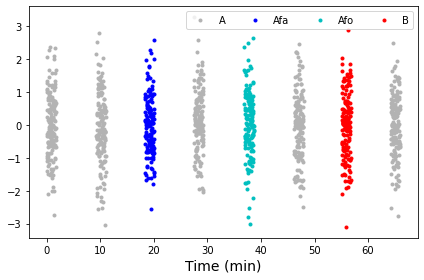

In [3]:
y        = dset.dv   # dependent variable
md       = dset.md   # metadata
onlyA    = False     # whether or not to fit the model to only the "A" conditions
model    = dtr.models.LinearDriftOverTimeModel( md, onlyA=onlyA )
yd       = model.detrend(y)  # detrended dependent variable

dset_new = dtr.Dataset0D( yd, md )

plt.figure()
dset_new.plot( legend=False )
plt.show()

Note that the linear trend across time has been removed.